## 1. import modules

In [22]:
from PIL import Image, ImageFilter, ImageEnhance
from scipy.misc import toimage
from operator import itemgetter
# from skimage import measure
import numpy as np
import copy
import heapq
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import math

### 2. convert image from RGB to gray

In [2]:
image_path = '/tmp/tmpfy7l5qjp.PNG'
image_path = '/tmp/tmp4u80rgr1.PNG'

In [3]:
im = Image.open(image_path)

In [4]:
image = cv2.imread(image_path)

In [5]:
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

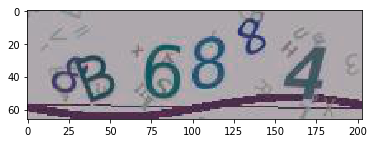

In [6]:
plt.imshow(image)
plt.show()

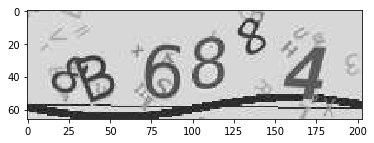

In [7]:
plt.imshow(im, cmap='gray')
plt.show()

In [8]:
im

array([[160, 152, 153, ..., 170, 170, 170],
       [159, 159, 165, ..., 170, 170, 170],
       [148, 157, 169, ..., 170, 170, 170],
       ...,
       [172, 157, 182, ..., 171, 171, 171],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170]], dtype=uint8)

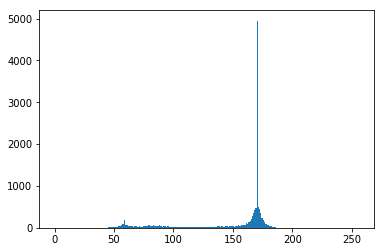

In [9]:
plt.hist(im.ravel(),256,[0,256]); plt.show()


### 3. calculate color histogram and find the second largest color

In [10]:
def del_noise(im_cut, max_bin = -4):
    ''' variable：bins：灰度直方图bin的数目
                  num_gray:像素间隔
        method：1.找到灰度直方图中像素第二多所对应的像素，即second_max,因为图像空白处比较多所以第一多的应该是空白，第二多的才是我们想要的内容。
                2.计算mode
                3.除了在mode+-一定范围内的，全部变为空白。
    '''
    bins =16
    num_gray = math.ceil(256 / bins)
    hist = cv2.calcHist([im_cut], [0], None, [bins], [0, 256])
    lists = []
    for i in range(len(hist)):
        # print hist[i][0]
        lists.append(hist[i][0])
    second_max = sorted(lists)[max_bin]
    bins_second_max = lists.index(second_max)

    mode = (bins_second_max + 0.5) * num_gray
    from copy import copy
    im_cuting = copy(im_cut)
    for i in range(len(im_cut)):
        for j in range(len(im_cut[0])):
            if im_cuting[i][j] < mode - 15 or im_cuting[i][j] > mode + 15:
                # print im_cut[i][j]
                im_cuting[i][j] = 255
    return im_cuting

In [11]:
cv2.calcHist

<function calcHist>

In [25]:
im_cuts = del_noise(im, -4)
cv2.imwrite('test.png', im_cuts)

True

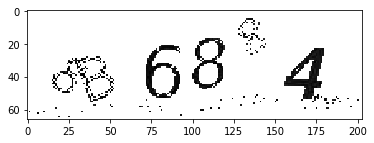

In [13]:
plt.imshow(im_cuts, cmap='gray')
plt.show()

### SVM

### segmentation

In [17]:

# 以灰度模式读取图片
gray = cv2.imread(image_path, 0)

# 将图片的边缘变为白色
height, width = gray.shape
for i in range(width):
    gray[0, i] = 255
    gray[height-1, i] = 255
for j in range(height):
    gray[j, 0] = 255
    gray[j, width-1] = 255

# 中值滤波
blur = cv2.medianBlur(gray, 3) #模板大小3*3
#print(blur)

# 二值化
ret,thresh1 = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)
#print(thresh1)


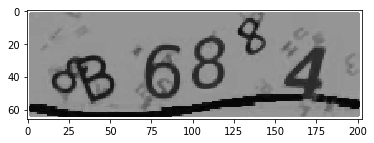

In [20]:
plt.imshow(blur, 'gray')

In [ ]:
image, contours, hierarchy = cv2.findContours(thresh1, 2, 2)

flag = 1
for cnt in contours:
    # 最小的外接矩形
    x, y, w, h = cv2.boundingRect(cnt)
    if x != 0 and y != 0 and w*h >= 100:
        print((x,y,w,h))
        # 显示图片
        cv2.imwrite('char%s.jpg'%flag, thresh1[y:y+h, x:x+w])
        flag += 1
